Data: NOAA climate data online request
https://www.ncdc.noaa.gov/cdo-web/search



In [2]:
import pandas as pd
from datetime import datetime
import calplot
import matplotlib.pyplot as plt

df = pd.read_csv('2773973.csv')
df=df.set_index('DATE')
df.index= pd.to_datetime(df.index)

df=df.drop(labels='2011-01-01', axis=0)
#df.tail(10)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


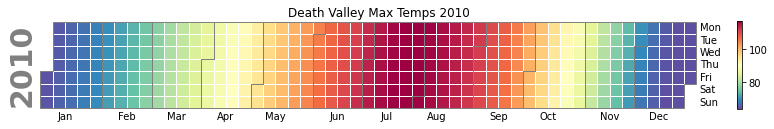

In [3]:
color_map= plt.get_cmap('Spectral')
reversed_color= color_map.reversed()
calplot.calplot(df['DLY-TMAX-NORMAL'], suptitle='Death Valley Max Temps 2010', cmap= reversed_color)
plt.show()

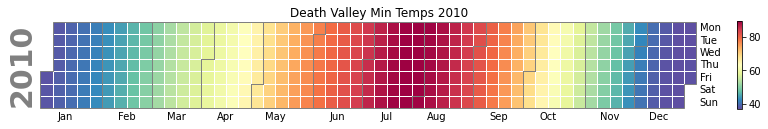

In [4]:
calplot.calplot(df['DLY-TMIN-NORMAL'], suptitle='Death Valley Min Temps 2010', cmap= reversed_color)
plt.show()

In [5]:
#ridgeline plots 

import numpy as np
import seaborn as sns
sns.set_theme(style="white", rc={"axes.facecolor": (0,0,0,0)})

temp= pd.read_csv('2773973.csv')
temp['DATE']=pd.to_datetime(temp['DATE'], errors='coerce')
temp['month']= (temp['DATE']).dt.month

month_dict={1:'january',
            2:'february',
            3:'march',
            4:'april',
            5:'may',
            6:'june',
            7:'july',
            8:'august',
            9:'september',
            10:'october',
            11:'november',
            12:'december'}
temp['month']= temp['month'].map(month_dict)
month_mean_serie = temp.groupby('month')['daily_mean'].mean()
temp['mean_month']= temp['month'].map(month_mean_serie)
temp.head()

,STATION,NAME,DATE,DLY-TMAX-NORMAL,DLY-TMIN-NORMAL,daily_mean,month,mean_month
0,USC00042319,"DEATH VALLEY, CA US",2010-01-01,64.4,37.7,51.05,january,53.376562
1,USC00042319,"DEATH VALLEY, CA US",2010-01-02,64.5,37.8,51.15,january,53.376562
2,USC00042319,"DEATH VALLEY, CA US",2010-01-03,64.7,37.9,51.30,january,53.376562
3,USC00042319,"DEATH VALLEY, CA US",2010-01-04,64.8,38.0,51.40,january,53.376562
4,USC00042319,"DEATH VALLEY, CA US",2010-01-05,65.0,38.2,51.60,january,53.376562


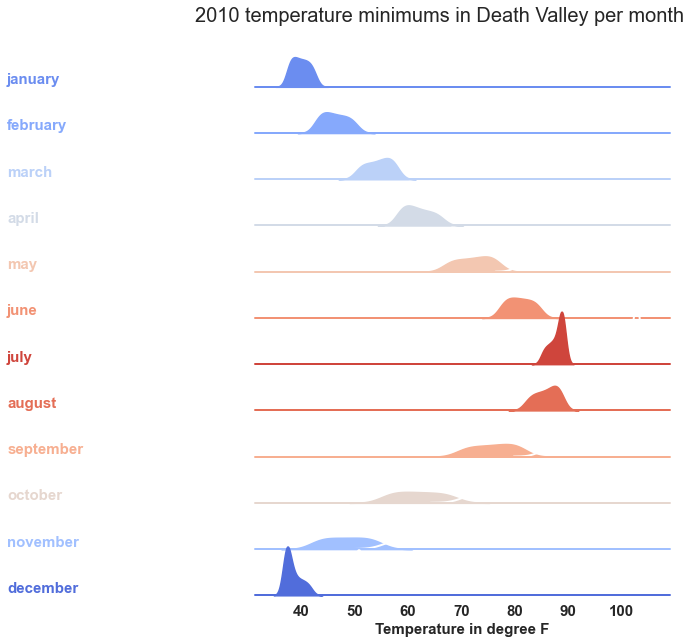

In [7]:
#adopted from this tutorial: https://www.python-graph-gallery.com/ridgeline-graph-seaborn

pal=sns.color_palette(palette='coolwarm', n_colors=12)

g=sns.FacetGrid(temp, row='month', hue='mean_month', aspect=9, height=0.75, palette=pal)

g.map(sns.kdeplot, 'DLY-TMIN-NORMAL', bw_adjust=1, clip_on=False, fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, 'daily_mean', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

g.fig.subplots_adjust(hspace=-0.3)

g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree F', fontweight='bold', fontsize=15)

g.set(ylabel='')
g.fig.suptitle('2010 temperature minimums in Death Valley per month',
               ha='center',
               fontsize=20,
               fontweight=20)

plt.show(g)

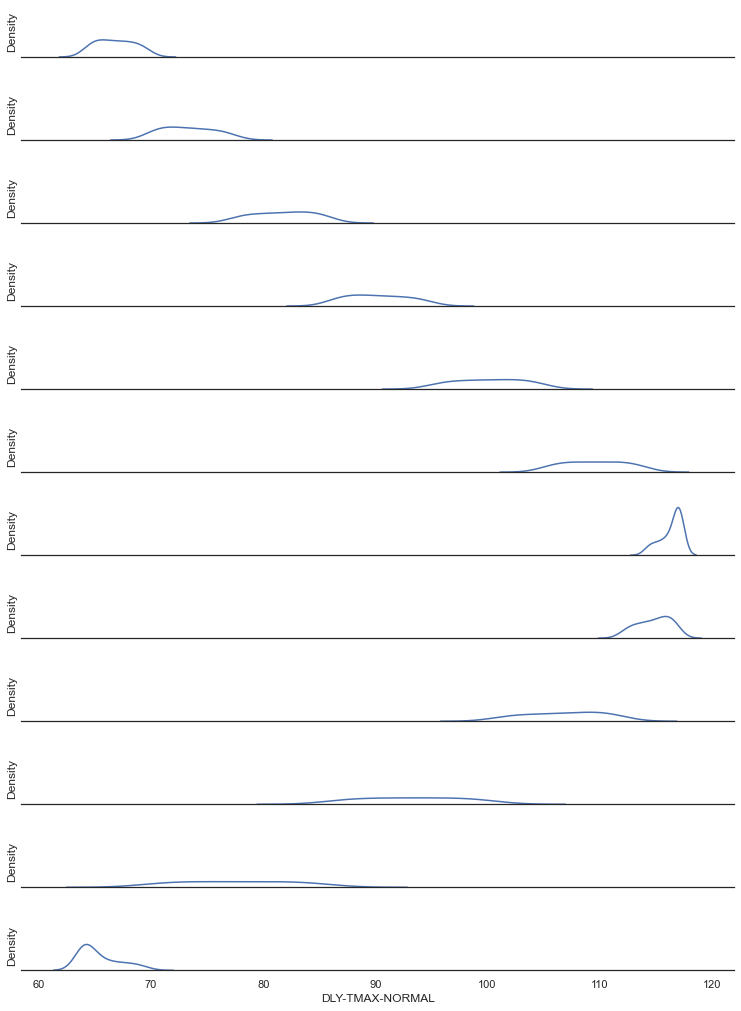

In [44]:
temp.head()
g2= sns.FacetGrid(temp, row="month", aspect=9, height=1.2)
g2.map_dataframe(sns.kdeplot, x="DLY-TMAX-NORMAL")

g2.set_titles("")
g2.set(yticks=[])
g2.despine(left=True)

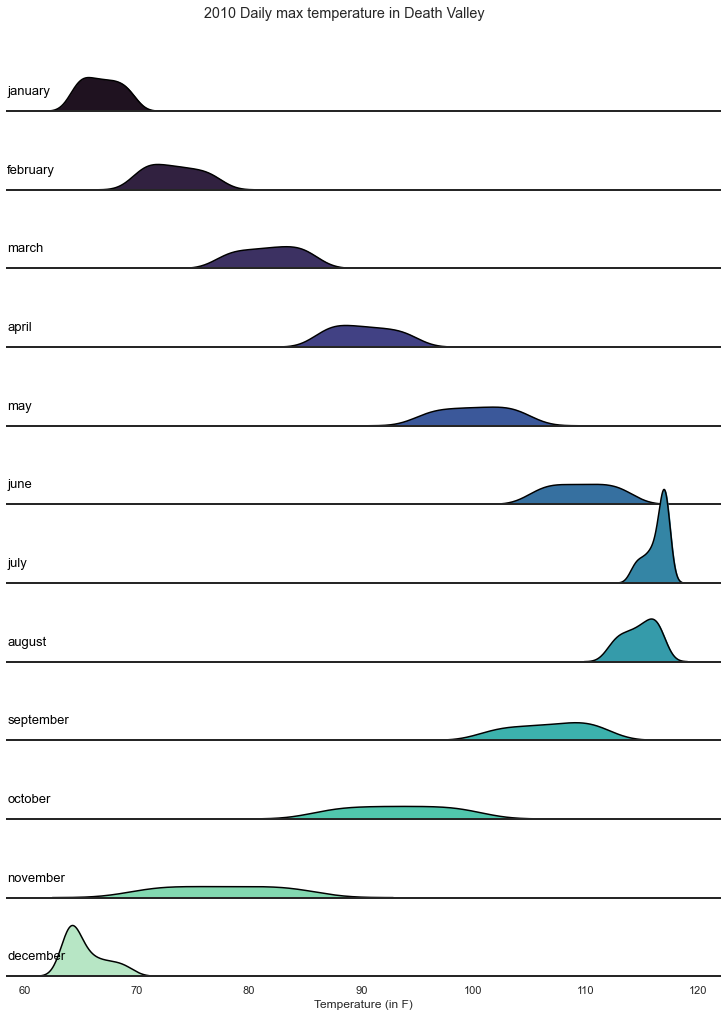

In [8]:
sns.set_theme(style="white", rc={"axes.facecolor": (0,0,0,0), 'axes.linewidth':2})
palette=sns.color_palette("mako", 12)
g3=sns.FacetGrid(temp, palette=palette, row="month", hue="month", aspect=9, height=1.2)
g3.map_dataframe(sns.kdeplot, x="DLY-TMAX-NORMAL", fill=True, alpha=1)
g3.map_dataframe(sns.kdeplot, x="DLY-TMAX-NORMAL", color='black')

def label(x, color, label):
    ax= plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13, ha="left", va="center", transform=ax.transAxes)

g3.map(label, "month")
g3.fig.subplots_adjust(hspace=-0.2)
g3.set_titles("")
g3.set(xlabel='Temperature (in F)', ylabel='')
g3.set(yticks=[])
g3.despine(left=True)

plt.suptitle('2010 Daily max temperature in Death Valley', y=0.98)
plt.show()